In [1]:
#!pip install matplotlib.pyplot
#!pip install seaborn
#!pip install pandas
#!pip install numpy
#!pip install geopandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('cian_parsing_result_sale_1_100_moskva_18_Nov_2023_23_04_31_527788.csv', sep=';')
df.head()

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price,district,street,house_number,underground,residential_complex
0,ANT Development,developer,https://www.cian.ru/sale/flat/291563636/,Москва,sale,flat,28,34,2,51.2,954271,48858726,Дорогомилово,Поклонная,9,Парк Победы,Поклонная 9
1,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/291778742/,Москва,sale,flat,37,37,-1,135.3,923872,125000000,Хорошевский,Ленинградский проспект,37/6,Аэропорт,Прайм Парк
2,ANT Development,developer,https://www.cian.ru/sale/flat/283856103/,Москва,sale,flat,10,34,3,86.8,1177508,102207781,Дорогомилово,Поклонная,9,Парк Победы,Поклонная 9
3,LaRichesse,real_estate_agent,https://www.cian.ru/sale/flat/281332469/,Москва,sale,flat,5,6,3,111.0,608018,67490000,Беговой,3-я Ямского Поля,9,Белорусская,Art Residence
4,ANT Development,developer,https://www.cian.ru/sale/flat/291385930/,Москва,sale,flat,26,34,4,134.1,966340,129586246,Дорогомилово,Поклонная,9,Парк Победы,Поклонная 9


In [4]:
df.isnull().sum()

author                   0
author_type              0
link                     0
city                     0
deal_type                0
accommodation_type       0
floor                    0
floors_count             0
rooms_count              0
total_meters             0
price_per_m2             0
price                    0
district                66
street                 138
house_number           159
underground             31
residential_complex    287
dtype: int64

In [5]:
df = df.dropna(subset=('residential_complex', 'house_number', 'district', 'street', 'underground'))

In [6]:
df.isna().sum()

author                 0
author_type            0
link                   0
city                   0
deal_type              0
accommodation_type     0
floor                  0
floors_count           0
rooms_count            0
total_meters           0
price_per_m2           0
price                  0
district               0
street                 0
house_number           0
underground            0
residential_complex    0
dtype: int64

c:\Users\vadim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\vadim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\vadim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\vadim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\vadim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been as

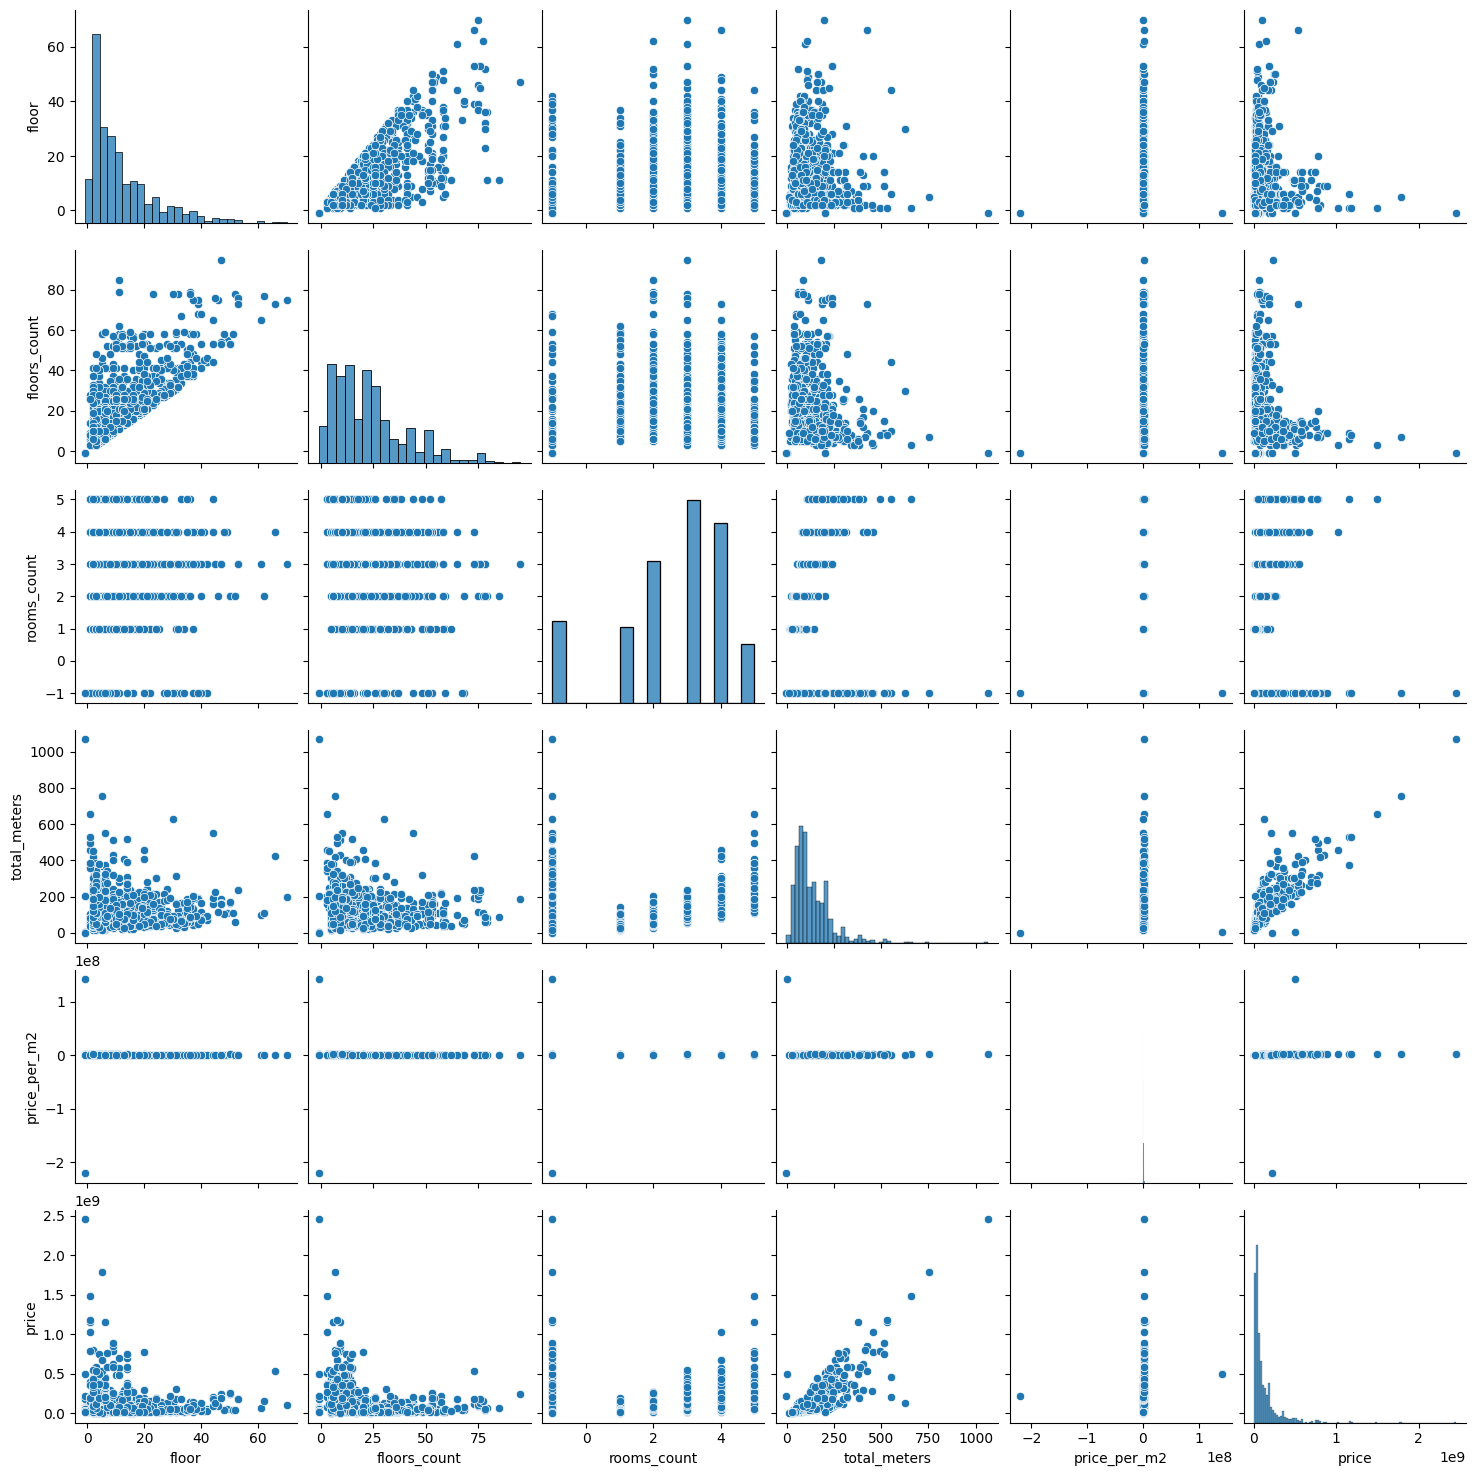

In [7]:
sns.pairplot(df, palette='flare')

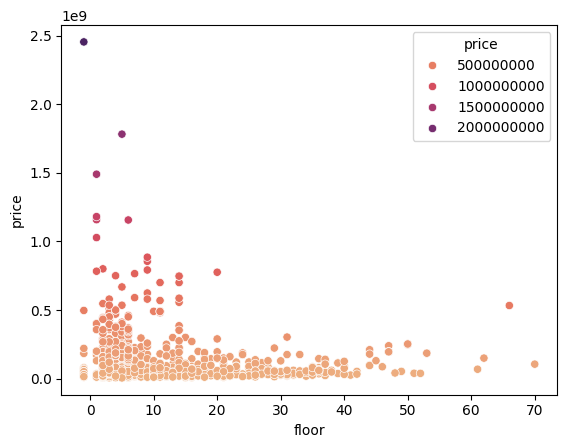

In [8]:
sns.scatterplot(data=df, x="floor", y="price", hue='price', palette='flare')
plt.title('')
plt.show()

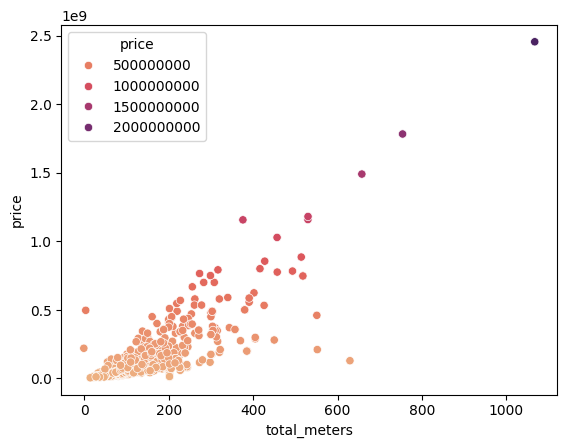

In [9]:
sns.scatterplot(data=df, x="total_meters", y="price", hue='price', palette='flare')
plt.show()

C:\Users\vadim\AppData\Local\Temp\ipykernel_11840\1023717943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=out, x=out.values(), y=out.keys(), palette='flare')


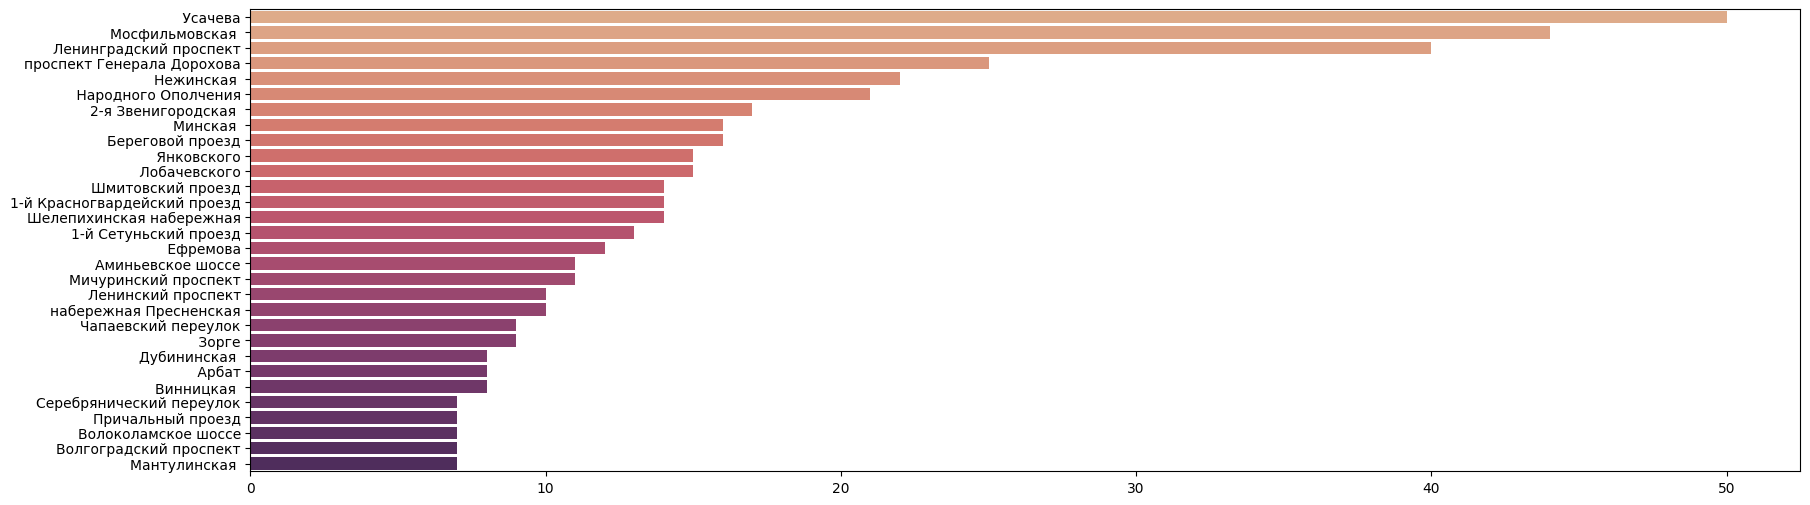

In [10]:
from collections import Counter
from itertools import islice

location_count = Counter(df['street'])
out = Counter()
location_count = dict(location_count.most_common(30))
out.update(dict(islice(location_count.items(), 30)))
plt.figure(figsize=(20,6))
sns.barplot(data=out, x=out.values(), y=out.keys(), palette='flare')
plt.show()

In [11]:
from collections import Counter
import geopandas as gpd

In [12]:
geodata = gpd.read_file('mo.geojson')

In [13]:
geodata = geodata[['NAME', 'geometry']]
prices_mean = df.groupby('district')['price'].mean()
df_price = pd.DataFrame(prices_mean)
df_price = df_price.reset_index()
geodata = geodata.rename(columns={"NAME": 'district'})

price_map = geodata.set_index('district').join(df_price.set_index('district'))
price_map = price_map.reset_index()

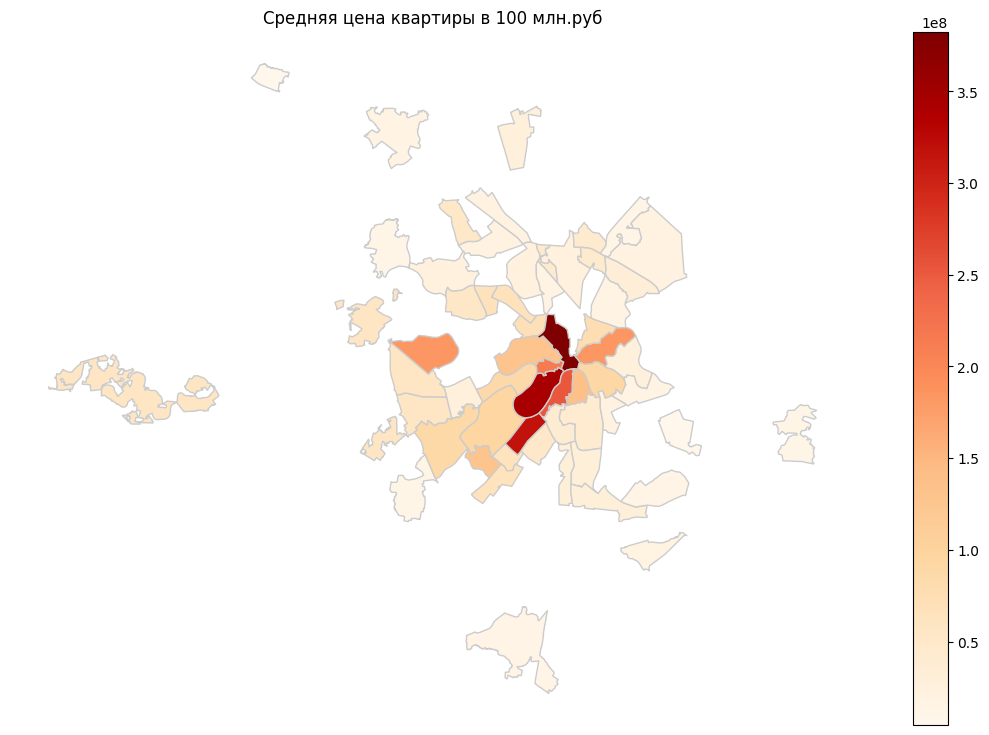

In [14]:
fig, ax = plt.subplots(1, figsize=(15, 9))

price_map.plot(column= 'price',
               cmap='OrRd',
               linewidth=1,
               ax=ax,
               edgecolor='0.8',
               legend=True,
               legend_kwds={'orientation': "vertical"},
                )
ax.axis('off')
plt.title('Cредняя цена квартиры в 100 млн.руб')
plt.show()

C:\Users\vadim\AppData\Local\Temp\ipykernel_11840\1295228661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(area_counts, palette='flare')


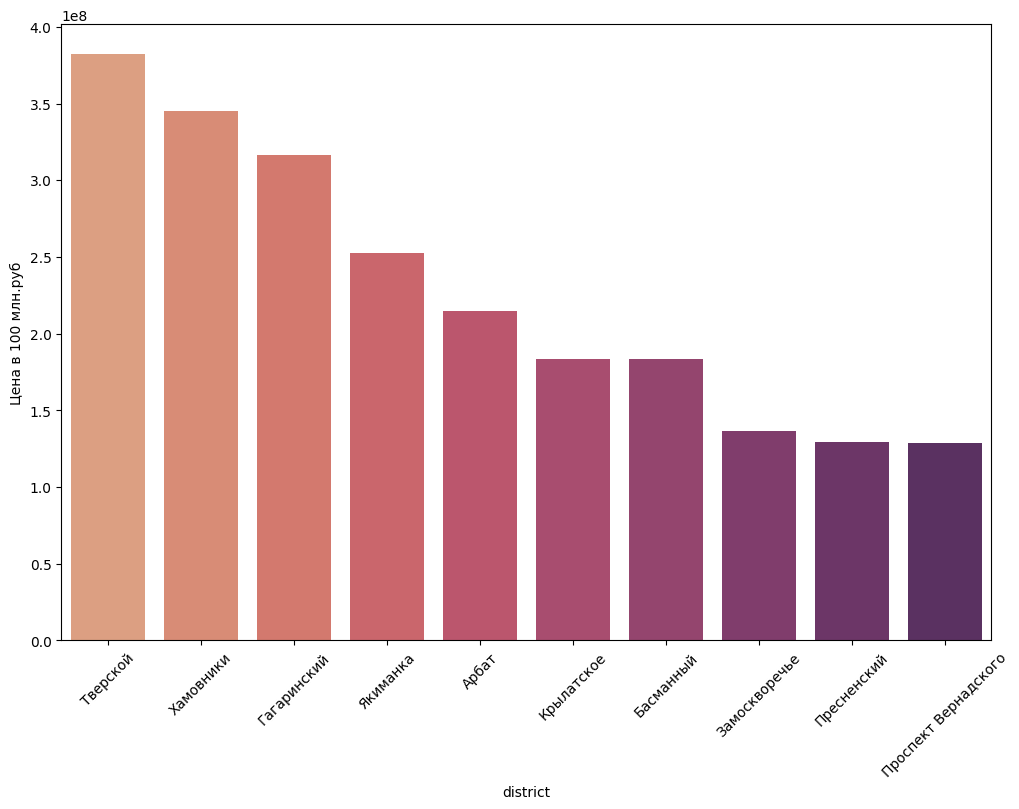

In [15]:
area_counts = prices_mean.nlargest(10)
plt.figure(figsize=(12,8))
sns.barplot(area_counts, palette='flare')
plt.xticks(rotation=45)
plt.ylabel('Цена в 100 млн.руб')
plt.show()

C:\Users\vadim\AppData\Local\Temp\ipykernel_11840\32774031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(complex_counts, palette='flare')


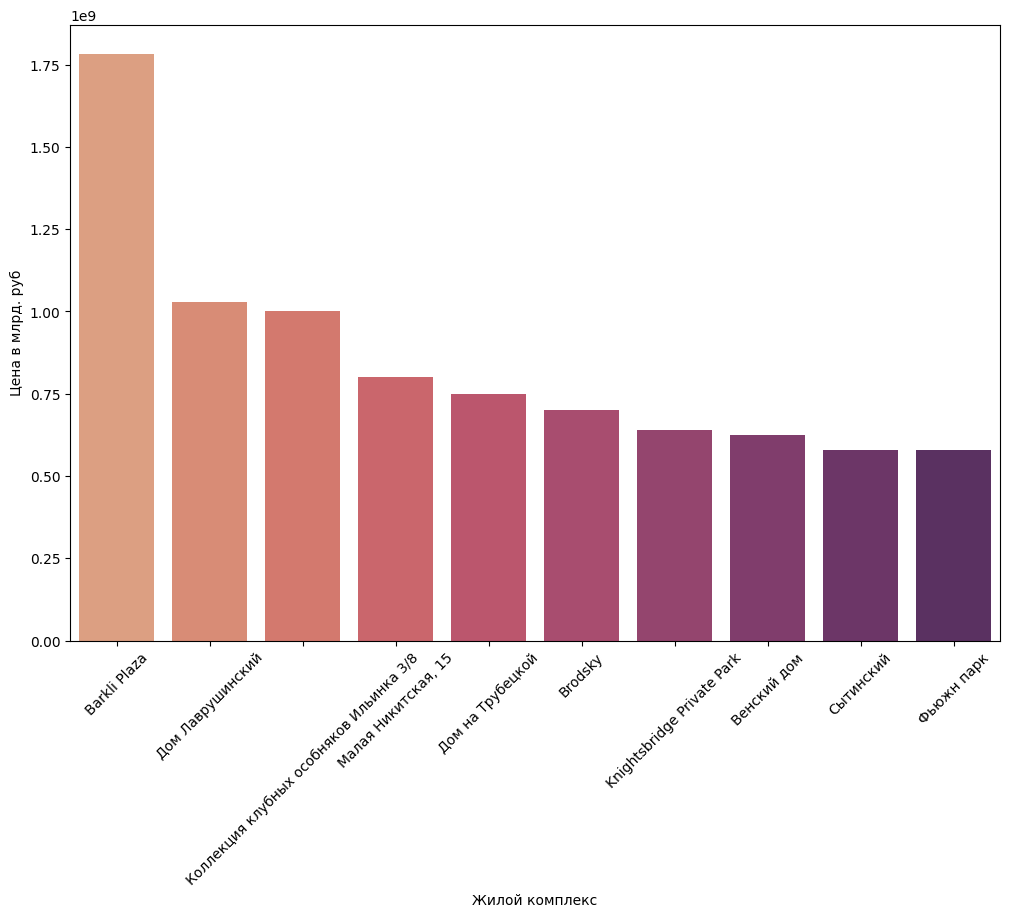

In [16]:
complex_prices = df.groupby('residential_complex')['price'].mean()
complex_counts = complex_prices.nlargest(10)
plt.figure(figsize=(12,8))
sns.barplot(complex_counts, palette='flare')
plt.xticks(rotation=45)
plt.ylabel('Цена в млрд. руб')
plt.xlabel('Жилой комплекс')
plt.show()

In [17]:
df = df.drop(['author', 'author_type', 'link', 'city', 'deal_type', 'accommodation_type', 'street', 'underground', 'house_number'],  axis=1)
print(df.head())

   floor  floors_count  rooms_count  total_meters  price_per_m2      price  \
0     28            34            2          51.2        954271   48858726   
1     37            37           -1         135.3        923872  125000000   
2     10            34            3          86.8       1177508  102207781   
3      5             6            3         111.0        608018   67490000   
4     26            34            4         134.1        966340  129586246   

       district residential_complex  
0  Дорогомилово         Поклонная 9  
1   Хорошевский          Прайм Парк  
2  Дорогомилово         Поклонная 9  
3       Беговой       Art Residence  
4  Дорогомилово         Поклонная 9  


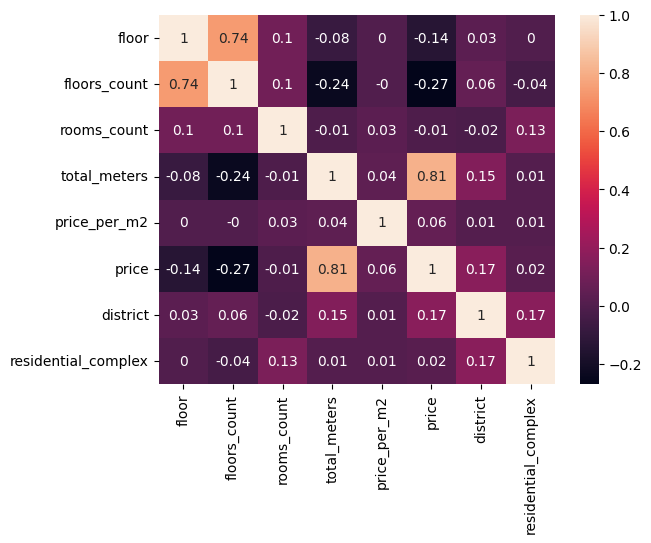

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[['district', 'residential_complex']] = df[['district', 'residential_complex']].apply(le.fit_transform)
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
x, y = df.drop('price', axis=1), df['price']
polynom_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = polynom_converter.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaler.fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

TRYING RIDGE REGRESSION

In [20]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import RidgeCV

model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)

EVALUATE MODEL

In [21]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(f'MAE : {MAE}\n MSE : {MSE}\n RMSE : {RMSE}')

MAE : 5537614.175283081
 MSE : 625957994558857.4
 RMSE : 25019152.554770064


In [21]:
ridge_cv = RidgeCV(alphas=(0.1, 1.0, 40.0), scoring='neg_mean_absolute_error')
ridge_cv.fit(X_train, y_train)
print(ridge_cv.alpha_)

0.1


In [22]:
ridge_y_pred = ridge_cv.predict(X_test)
MAE_ridge = mean_absolute_error(y_test, ridge_y_pred)
MSE_ridge = mean_squared_error(y_test, ridge_y_pred)
RMSE_ridge = np.sqrt(MSE_ridge)
print(f'MAE : {MAE_ridge}\n MSE : {MSE_ridge}\n RMSE : {RMSE_ridge}')

MAE : 378650.4009244565
 MSE : 1956408927428.0518
 RMSE : 1398716.8860881217


In [23]:
ridge_cv.coef_

array([-5.92090545e+05,  4.97718905e+05,  4.92884525e+05,  1.64778494e+06,
        4.03346861e+06, -8.67456719e+05, -2.05250934e+05, -9.70516128e+05,
        4.29454977e+05, -2.61218786e+05, -1.75618554e+05,  2.78172179e+06,
        5.21274955e+05, -3.35105997e+05, -5.15519651e+05, -8.87201308e+05,
       -3.26467753e+05, -3.34956597e+04,  4.31240576e+05, -1.50807089e+05,
       -1.04520932e+06,  1.73599738e+05,  7.80435632e+06,  1.21958271e+06,
       -1.10930535e+06,  3.27340206e+06,  1.48014964e+08, -1.88627894e+06,
       -5.50002634e+05, -2.43134398e+05, -1.36443948e+06,  2.60035716e+06,
        1.47226818e+06,  4.94997368e+05,  1.15227781e+06,  6.37999477e+04,
       -2.92152901e+05,  5.99710883e+05, -3.36485300e+05,  7.27661916e+05,
        4.37701390e+05, -2.12899776e+05,  3.62468755e+05, -2.76971868e+05,
        3.12268338e+04, -1.10991101e+06, -2.05081908e+05,  6.75224170e+05,
        5.67702474e+04, -4.74466039e+04,  4.60975273e+05, -6.72805747e+05,
        1.83287287e+05,  

ELASTIC NET

In [24]:
from sklearn.linear_model import ElasticNetCV
callbacks = [EarlyStopping(patience=5, min_delta=1e-2)]
model_net = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=100000)
model_net.fit(X_train, y_train)
model_net.l1_ratio_

1.0

In [25]:
y_pred_net = model_net.predict(X_test)
MAE_net = mean_absolute_error(y_test, y_pred_net)
MSE_net = mean_squared_error(y_test, y_pred_net)
RMSE_net = np.sqrt(MSE_ridge)
print(f'MAE : {MAE_net}\n MSE : {MSE_net}\n RMSE : {RMSE_net}')


MAE : 114533.71084835479
 MSE : 58808520316.60135
 RMSE : 1398716.8860881217


In [26]:
from sklearn.metrics import r2_score
model_net.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.54740587e+08,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

LASSO

In [27]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV()
model_lasso.fit(X_train, y_train)
model_lasso.alpha_

154895.48219167668

In [28]:
y_pred_lasso = model_lasso.predict(X_test)
MAE_lasso = mean_absolute_error(y_test, y_pred_lasso)
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(MSE_ridge)
print(f'MAE : {MAE_lasso}\n MSE : {MSE_lasso}\n RMSE : {RMSE_lasso}')

MAE : 114533.71084835479
 MSE : 58808520316.60135
 RMSE : 1398716.8860881217


In [29]:
model_lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.54740587e+08,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

LEARNING CURVE

In [30]:
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit

In [31]:
r2_net = r2_score(y_test, y_pred_net)
r2_ridgecv = r2_score(y_test, ridge_y_pred)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred)
print("R^2 score for Neural Network WITH ElasticNetCV: ", r2_net)
print("R^2 score for Neural Network WITH RidgeCV: ", r2_ridgecv)
print("R^2 score for Neural Network WITH LassoCV: ", r2_lasso)
print("R^2 score for Neural Network WITH Ridge: ", r2_ridge)
print(max([r2_ridgecv, r2_net, r2_lasso, r2_ridge]))

R^2 score for Neural Network WITH ElasticNetCV:  0.9999989979704641
R^2 score for Neural Network WITH RidgeCV:  0.9999666650424285
R^2 score for Neural Network WITH LassoCV:  0.9999989979704641
R^2 score for Neural Network WITH Ridge:  0.9893343958424865
0.9999989979704641


IT MEANS THAT ElasticNetCV HAS BEST R^2 SCORE FOR NN(0.9999989979704641)

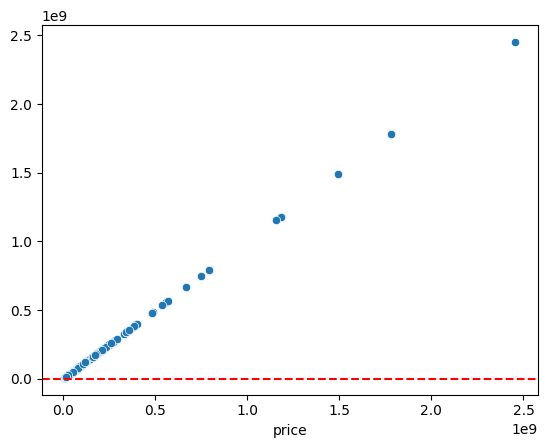

In [33]:
sns.scatterplot(x=y_test, y=y_pred_net)
plt.axhline(y=0, color='r', ls='--')
plt.show()